In [1]:
import root_numpy as rn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f = rn.root2array('eres.root',treename='tree')

df0 = pd.DataFrame(f)
#print df

df = df0.query('e_true > e_mcc')
print df.shape, df0.shape

(2702, 2) (2788, 2)


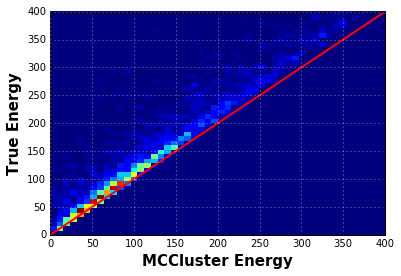

In [33]:
x = np.linspace(0,400,100)

_ = plt.hist2d(df.e_mcc.values,df.e_true.values,bins=50,range=((0,400),(0,400)))
plt.xlabel('MCCluster Energy',fontsize=15,weight='bold')
plt.ylabel('True Energy',fontsize=15,weight='bold')
plt.plot(x,x,lw=2,color='r')
plt.grid(True,color='w')

[  3.19443121e+02  -9.38611352e-02   5.01457202e-02]


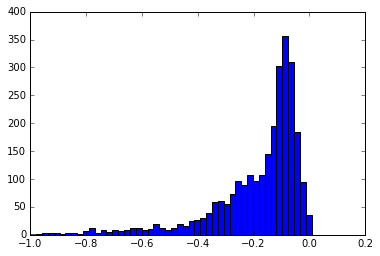

In [27]:
from scipy.optimize import curve_fit

x_g = np.linspace(-.2,.05,100)

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

n_counts, bin_edges, _ = plt.hist((df.e_mcc.values - df.e_true.values)/df.e_true.values,bins=50,range=(-1,0.05))
bins = (bin_edges[:-1] + bin_edges[1:])/2

coeff, _ = curve_fit(gauss, bins, n_counts, p0=([450.,0,0.1]))

print coeff

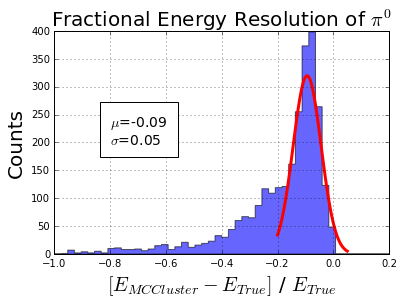

In [34]:
_ = plt.hist((df.e_mcc.values - df.e_true.values)/df.e_true.values,bins=50,histtype='stepfilled',alpha=0.6,range=(-1.,0.2))
plt.grid(True)

plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(-.8, 200, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], coeff[2]),fontsize=14,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Resolution of $\pi^0$",fontsize=20)
plt.xlabel("$[E_{MCCluster} - E_{True}]$ / $E_{True}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)